# Explore here

It's recommended to use this notebook for exploration purposes.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup
import requests
import urllib.request
import re
import time
from urllib.request import Request, urlopen
import lxml
import html5lib
import datetime
import sqlite3
import seaborn as sns


Extracción Datos y procesamiento.

In [17]:
req = Request('https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue', headers={'User-Agent': 'XYZ/3.0'})
webpage = urlopen(req, timeout=10).read()
soup = BeautifulSoup(webpage, 'html.parser')
tablas = soup.find_all('table')

In [18]:
for indice, tabla in enumerate(tablas):
    if ("Tesla Quarterly Revenue" in str(tablas)):
        tablas.index = indice
        break

In [19]:
resultado = pd.read_html(str(tablas))[1]
tabladf =pd.DataFrame(resultado)
tabladf = tabladf.rename(columns={"Tesla Quarterly Revenue(Millions of US $)": "Fecha", "Tesla Quarterly Revenue(Millions of US $).1": "Monto"})
tabladf.replace('\$', '', regex=True, inplace=True)
tabladf.replace(',', '',  regex=True, inplace=True)
tabladf.head()

,Fecha,Monto
0,2023-09-30,23350
1,2023-06-30,24927
2,2023-03-31,23329
3,2022-12-31,24318
4,2022-09-30,21454


In [20]:
tabladf.fillna(0, inplace=True)

Conectar base de datos SQL

In [21]:
connection = sqlite3.connect("tablatesla.db")

In [22]:
cursor = connection.cursor()
cursor.execute("""CREATE TABLE revenue (Fecha, Monto)""")

In [23]:
Tabla_tp = list(tabladf.to_records(index = False))
Tabla_tp[:5]

[('2023-09-30', '23350'),
 ('2023-06-30', '24927'),
 ('2023-03-31', '23329'),
 ('2022-12-31', '24318'),
 ('2022-09-30', '21454')]

In [24]:
cursor.executemany("INSERT INTO revenue VALUES (?,?)", Tabla_tp)
connection.commit()

In [25]:
connection.close()

<Axes: xlabel='Fecha', ylabel='Monto'>

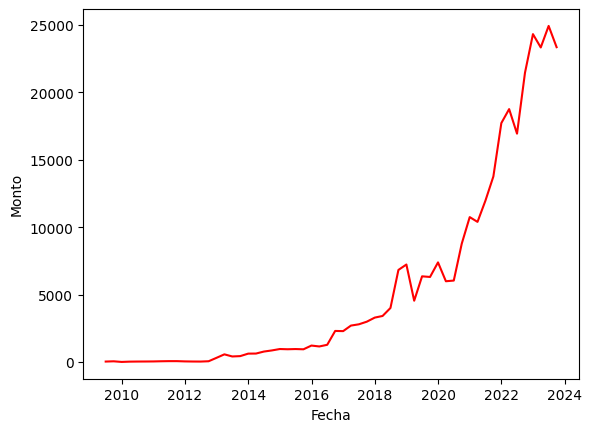

In [26]:
tabladf["Fecha"] = pd.to_datetime(tabladf["Fecha"])
tabladf["Monto"] = tabladf["Monto"].replace('' , '0').astype('int')

sns.lineplot(data= tabladf,x= "Fecha", y="Monto", color="r")


/tmp/ipykernel_557/3894432875.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45)


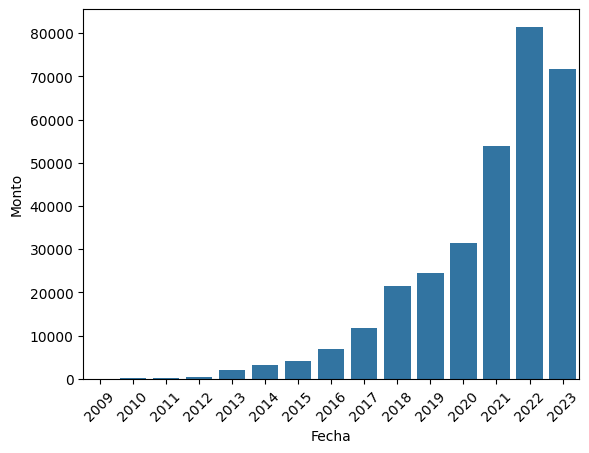

In [50]:

# Agrupamos los datos por año y calculamos la suma de los montos
df_anio = tabladf.groupby(pd.to_datetime(tabladf["Fecha"]).dt.to_period("A"))["Monto"].sum().reset_index()
# Creamos el gráfico de barras con sns.barplot usando los datos por año
grafico = sns.barplot(data=df_anio, x="Fecha", y="Monto")

plt.tight_layout
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45)
plt.show()


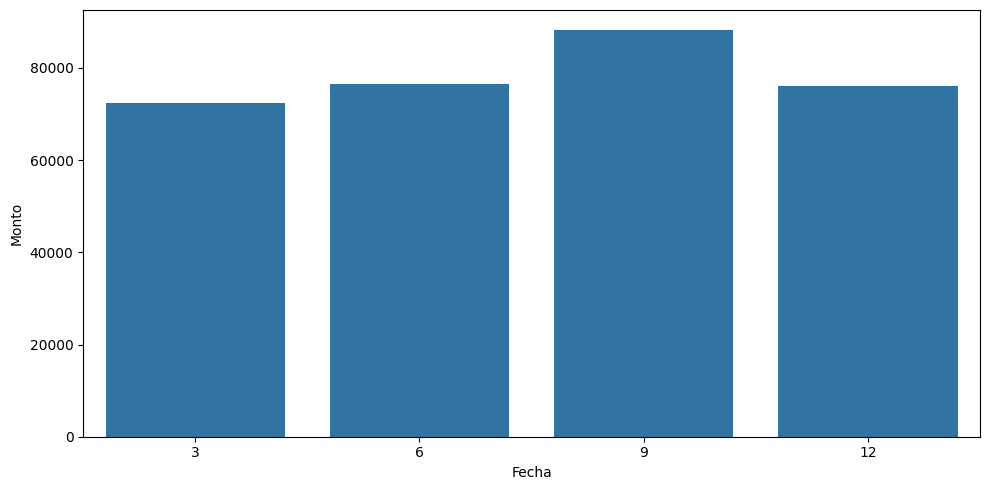

In [51]:
fig, axis = plt.subplots(figsize = (10, 5))

tesla_mensual = tabladf.groupby(tabladf["Fecha"].dt.month).sum().reset_index()

sns.barplot(data = tesla_mensual, x = "Fecha", y = "Monto")

plt.tight_layout()

plt.show()